In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  5 00:22:28 2022

@author: rajsinghbani
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
from numpy import linalg as LA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
data = pd.read_csv("/Users/rajsinghbani/Downloads/LAB3-2022/pima-indians-diabetes.csv")

In [2]:
#Question 1
for i in data.columns[:8]:
    upper = data[i].quantile(q=0.75)+1.5*(data[i].quantile(q=0.75)-data[i].quantile(q=0.25))
    lower = data[i].quantile(q=0.25)-1.5*(data[i].quantile(q=0.75)-data[i].quantile(q=0.25))
    data[i] = data[i].mask(data[i]>upper, data.median()[i])
    data[i] = data[i].mask(data[i]<lower, data.median()[i])
mini = data.iloc[:,:8].min().tolist()
maxi = data.iloc[:,:8].max().tolist()
scaler = MinMaxScaler(feature_range=(5,12))
data_scaled = pd.DataFrame(scaler.fit_transform(data))
min_scaled = data_scaled.iloc[:,:8].min().tolist()
max_scaled = data_scaled.iloc[:,:8].max().tolist()
print(mini)

[0.0, 44.0, 38.0, 0.0, 0.0, 18.2, 0.078, 21.0]


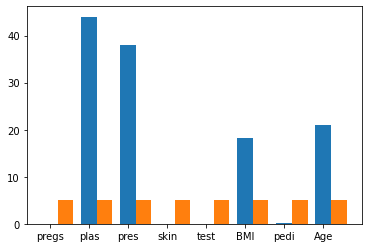

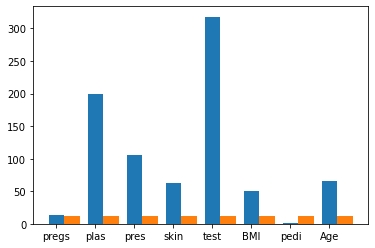

In [3]:
#(a)
len = np.arange(8)
width = 0.4
plt.bar(len,mini,width=width)
plt.bar(len+width,min_scaled,width=width)
plt.xticks(len,data.columns[:8])
plt.show()
plt.bar(len,maxi,width=width)
plt.bar(len+width,max_scaled,width=width)
plt.xticks(len,data.columns[:8])
plt.show()


The means of the outlier corrected data is: pregs      3.782552
plas     121.656250
pres      72.196615
skin      20.437500
test      60.919271
BMI       32.198958
pedi       0.427667
Age       32.760417
dtype: float64
The std deviations of the outlier corrected data is: pregs     3.270644
plas     30.438286
pres     11.146723
skin     15.698554
test     77.635666
BMI       6.410558
pedi      0.245162
Age      11.055385
dtype: float64


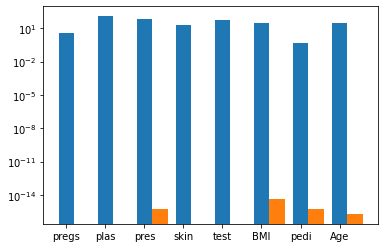

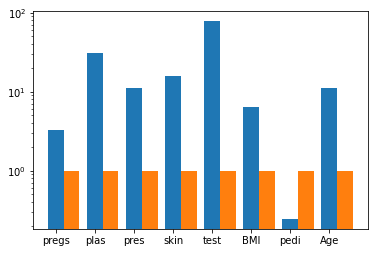

pregs   -1.324172e-16
plas    -5.637851e-18
pres     4.840240e-16
skin    -1.445603e-19
test    -1.734723e-17
BMI      3.896839e-15
pedi     4.870236e-16
Age      1.937108e-16
class    3.189000e-16
dtype: float64


In [4]:
#(b)
print('The means of the outlier corrected data is:',data.iloc[:,:8].mean())
print('The std deviations of the outlier corrected data is:',data.iloc[:,:8].std())
data1 = data.copy()
data1 = (data1 - data1.mean())/data1.std()
#display(data1)
#display(data)
len = np.arange(8)
width = 0.4
plt.yscale("log")
plt.bar(len,data.iloc[:,:8].mean().tolist(),width=width)
plt.bar(len+width,data1.iloc[:,:8].mean().tolist(),width=width)
plt.xticks(len,data.columns[:8])
plt.show()
plt.yscale("log")
plt.bar(len,data.iloc[:,:8].std().tolist(),width=width)
plt.bar(len+width,data1.iloc[:,:8].std().tolist(),width=width)
plt.xticks(len,data.columns[:8])
plt.show()
print(data1.mean())

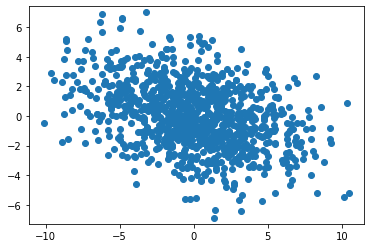

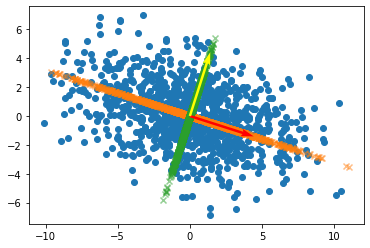

The reconstruction loss is 1.3619031956977478e-14


In [5]:
#Question 2
mean = [0,0]
cov = [[13,-3],[-3,5]]
data = rd.multivariate_normal(mean, cov, size = 1000)
#(A)
plt.scatter(data[:,0],data[:,1])
plt.axis('equal')
plt.show()
plt.scatter(data[:,0],data[:,1])
plt.axis('equal')
#(B)
eig_val, eig_vec = LA.eig(np.cov(data.T))
#(C)
def project(data,i,j):
    x = []
    y = []
    n = []
    for k in data:
        x.append(i*(k[0]*i+k[1]*j))
        y.append(j*(k[0]*i+k[1]*j))
        n.append(k[0]*i+k[1]*j)
    plt.scatter(x,y,marker='x',alpha=0.5)
    return n
vals1 = project(data,eig_vec[0][0],eig_vec[1][0])
vals2 = project(data,eig_vec[0][1],eig_vec[1][1])
plt.quiver(0,0,eig_vec[0][0],eig_vec[1][0],scale=5,color='red')
plt.quiver(0,0,eig_vec[0][1],eig_vec[1][1],scale=5,color='yellow')
plt.show()
#(D)
pca_data = np.array([vals1,vals2]).T
recon_data = np.dot(pca_data, eig_vec.T)
loss = LA.norm(recon_data - data).mean()
print("The reconstruction loss is",loss)

Variance along PCA1 is 1.9924630470891034
Variance along PCA2 is 1.8534221929648187
Eig Val along PCA1 is 1.9924630470891036
Eig Val along PCA2 is 1.853422192964819


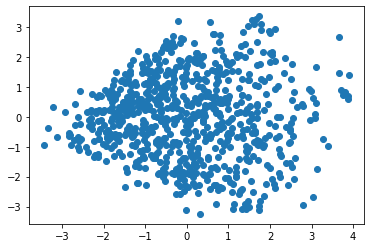

ALL EIGEN VALUES ARE [1.99246305 1.85342219 0.98187914 0.85830733 0.8387496  0.63640837
 0.43414282 0.40462751]


In [6]:
#Question 3
data1 = data1.iloc[:,:8]
data2 = data1.copy()
cov1 = np.cov(data1.T)
eig_valu, eig_vect = LA.eig(cov1)
eig_valu.sort()
pca = PCA(n_components=2)
data1 = pca.fit_transform(data1)
#(A)
print("Variance along PCA1 is", pca.explained_variance_[0])
print("Variance along PCA2 is", pca.explained_variance_[1])
print("Eig Val along PCA1 is", eig_valu[-1])
print("Eig Val along PCA2 is", eig_valu[-2])
plt.scatter(data1[:,0],data1[:,1])
plt.show()
#(B)
print("ALL EIGEN VALUES ARE",eig_valu[::-1])

COVARIANCE MATRIX
 [[ 1.99246305 -0.        ]
 [-0.          1.85342219]]

COVARIANCE MATRIX
 [[ 1.99246305  0.          0.        ]
 [ 0.          1.85342219 -0.        ]
 [ 0.         -0.          0.98187914]]

COVARIANCE MATRIX
 [[ 1.99246305  0.          0.         -0.        ]
 [ 0.          1.85342219  0.         -0.        ]
 [ 0.          0.          0.98187914 -0.        ]
 [-0.         -0.         -0.          0.85830733]]

COVARIANCE MATRIX
 [[ 1.99246305  0.          0.          0.         -0.        ]
 [ 0.          1.85342219  0.          0.          0.        ]
 [ 0.          0.          0.98187914  0.         -0.        ]
 [ 0.          0.          0.          0.85830733  0.        ]
 [-0.          0.         -0.          0.          0.8387496 ]]

COVARIANCE MATRIX
 [[ 1.99246305  0.          0.          0.         -0.         -0.        ]
 [ 0.          1.85342219 -0.          0.          0.          0.        ]
 [ 0.         -0.          0.98187914  0.         -0.    

<BarContainer object of 8 artists>

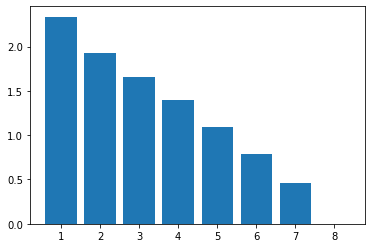

In [7]:
#(C)
rec_err = []
for i in range(1,9):
    pca = PCA(n_components = i)
    data_ = pca.fit_transform(data2)
    if i!=1:
        np.set_printoptions(suppress=True, linewidth=150)
        print("COVARIANCE MATRIX\n",np.cov(data_.T))
        print()
    data_temp = pca.inverse_transform(data_)
    oss = LA.norm(data2.to_numpy() - data_temp ,axis=1).mean()
    rec_err.append(oss)
cov_matrix = np.cov(data_.T)
print(rec_err)
plt.bar(np.arange(1, 9),rec_err)

In [8]:
#(D)
print(cov1)
print()
print(cov_matrix)

[[ 1.          0.11769181  0.20895257 -0.09671983 -0.10847432  0.02833866  0.00451934  0.56076826]
 [ 0.11769181  1.          0.20453924  0.06003394  0.17956583  0.22824456  0.08161316  0.27426393]
 [ 0.20895257  0.20453924  1.          0.02564489 -0.05095573  0.27155977  0.02249532  0.32637214]
 [-0.09671983  0.06003394  0.02564489  1.          0.47271404  0.37372623  0.15276274 -0.10139685]
 [-0.10847432  0.17956583 -0.05095573  0.47271404  1.          0.17150332  0.19857961 -0.07372567]
 [ 0.02833866  0.22824456  0.27155977  0.37372623  0.17150332  1.          0.12377566  0.07766829]
 [ 0.00451934  0.08161316  0.02249532  0.15276274  0.19857961  0.12377566  1.          0.03610929]
 [ 0.56076826  0.27426393  0.32637214 -0.10139685 -0.07372567  0.07766829  0.03610929  1.        ]]

[[ 1.99246305  0.         -0.         -0.          0.          0.         -0.         -0.        ]
 [ 0.          1.85342219  0.         -0.          0.          0.          0.         -0.        ]
 [-0.   